In [32]:
from IPython.display import display, HTML

display(HTML("""
<h1 style='color:#2c3e50;'>CarDekho Price Prediction</h1>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
CarDekho has launched a vehicle shopping mall in India, aiming to provide enhanced data-driven insights
into the used car industry.
</p>

<h3 style='color:#2c3e50;'>Problem Statement</h3>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The used car market in India is dynamic and unpredictable. Car prices can vary widely depending on factors such as
the make and model, mileage, vehicle condition, and changing market trends. These fluctuations make it challenging
for sellers to accurately estimate the appropriate selling price of their cars.
</p>

<p style='font-size:16px;'>
<b>Dataset Link:</b><br>
<a href='https://drive.google.com/file/d/1WtxKHx5uQoFYmAEKNWs0Jdx4jkS-OXDq/view?usp=sharing' target='_blank'>
Click here to access the dataset
</a>
</p>
"""))


In [33]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Approach</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
We propose to develop a <b>machine learning model</b> that can predict the price of a used car 
based on its features. The model will be trained on a dataset of used cars sold on 
<b>CarDekho.com</b> in India. Once trained, the model will be capable of predicting the price 
of any used car when its key features are provided.
</p>

<h2 style='color:#2c3e50;'>Objective</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
To build a <b>Machine Learning Model</b> that accurately performs <b>Used Car Price Prediction</b> 
and supports informed pricing decisions.
</p>
"""))


In [34]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Benefits</h2>

<p style='font-size:15px; line-height:1.7; text-align:justify;'>
The benefits of this solution include:
</p>

<ul style='font-size:15px; line-height:1.7;'>
    <li><b>Sellers</b> can price their cars more accurately, enabling faster sales and higher profitability.</li>
    <li><b>Buyers</b> will benefit from competitively priced vehicles, improving their decision-making process.</li>
    <li>The overall <b>used car market in India</b> becomes more efficient, transparent, and data-driven.</li>
</ul>
"""))


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
 # Load dataset
df = pd.read_csv("Cardekho.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [6]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB
None
   Unnamed: 0       car_name    brand     model  vehicle

In [7]:
# Handling missing values
df.dropna(inplace=True)
 # Encoding categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
 # Splitting data
X = df.drop(columns=['selling_price'])  # Assuming 'Price' is the target column
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=42)
 # Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 # Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
RandomForestRegressor(random_state=42)
 # Predictions
y_pred = model.predict(X_test)
 # Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 95634.00421667207
MSE: 46967123043.60201
RMSE: 216718.99557630386
R² Score: 0.9376085824107755


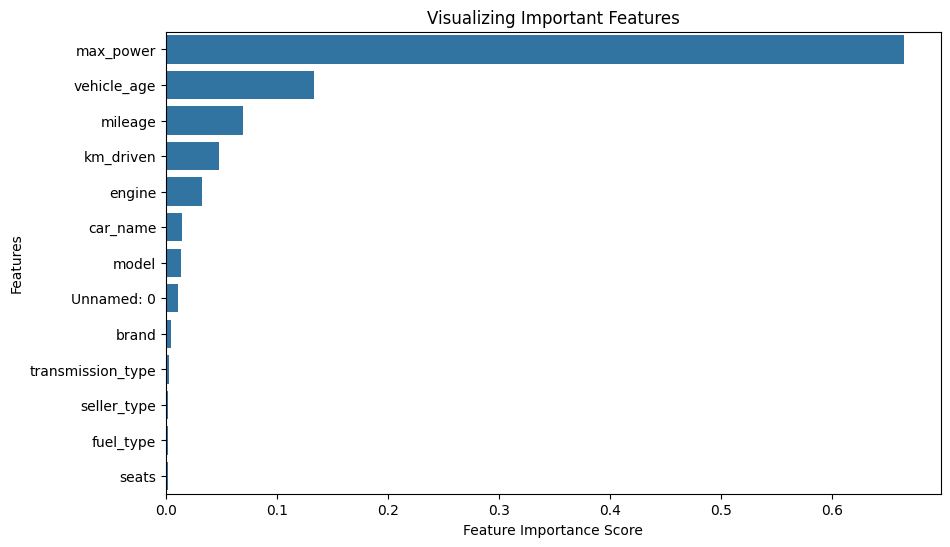

In [8]:
 # Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


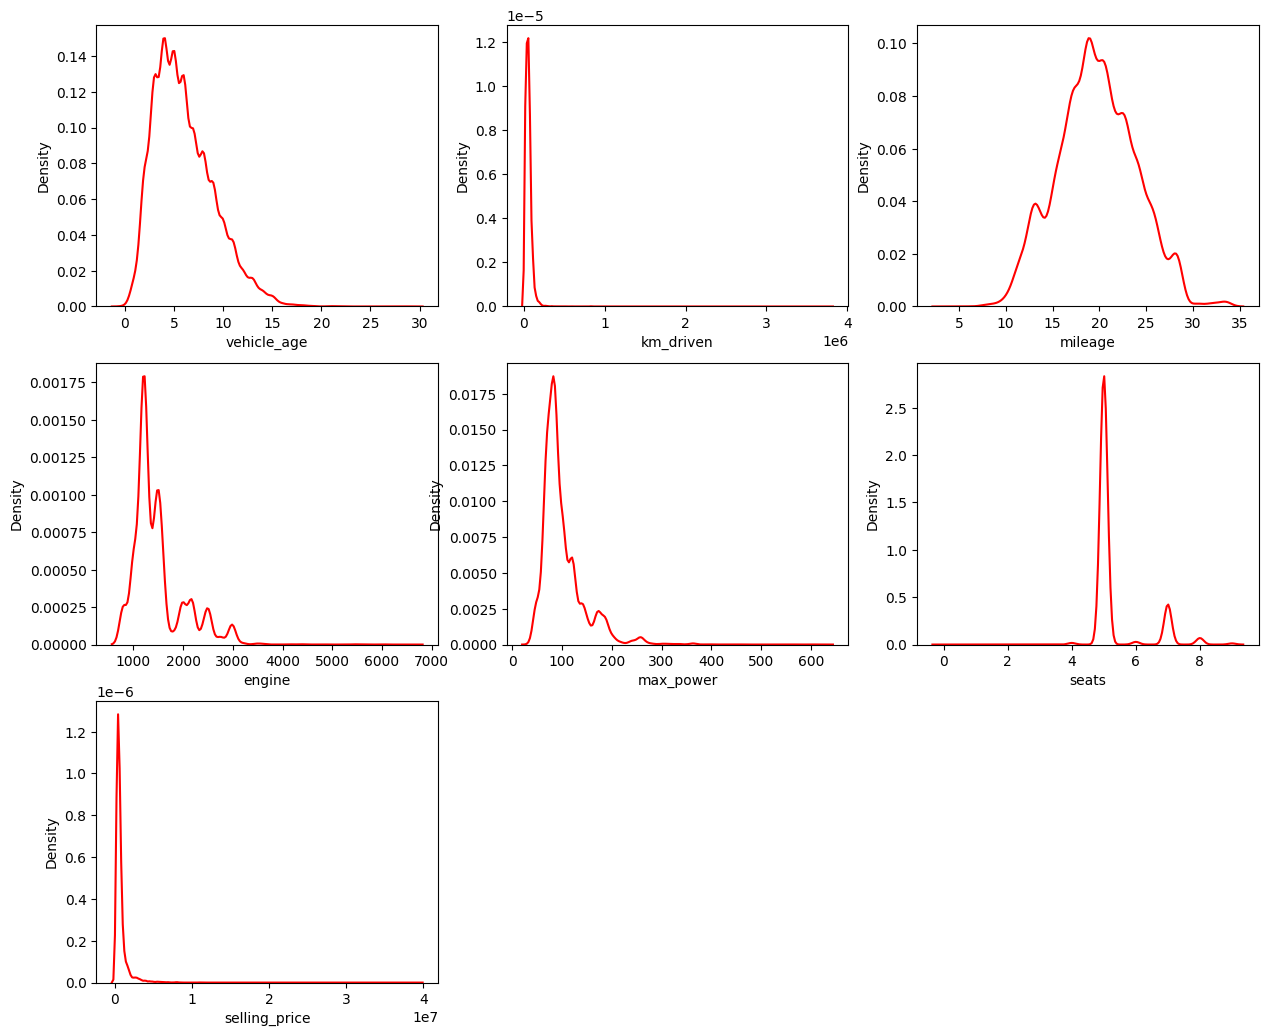

In [29]:
# Plot the density graphs of each of the numerical columns
num_columns = ['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price']
plt.figure(figsize=(15, 30))
for i in range(len(num_columns)):
   plt.subplot(7, 3, i+1) 
   sns.kdeplot(data = df[num_columns[i]],color='r')
plt.show()

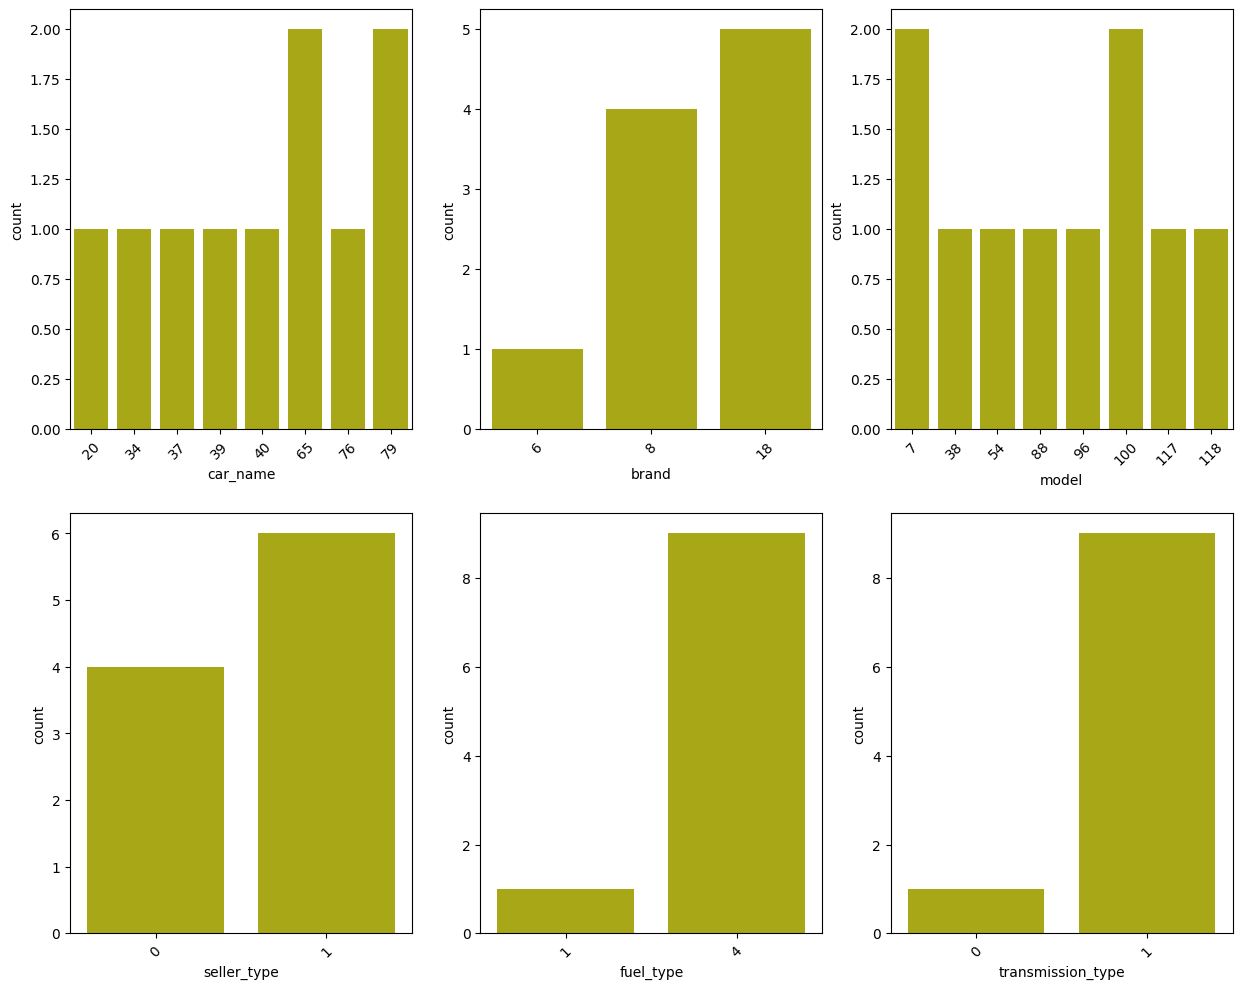

In [28]:
# Plot the countplots of each of the categorical columns
cat_columns= ['car_name','brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(15, 12))
for i in range(len(cat_columns)):
    plt.subplot(2,3,i+1)
    plt.xticks(rotation =45)
    sns.countplot(x=df[cat_columns[i]].head(10),color='y')
plt.show()

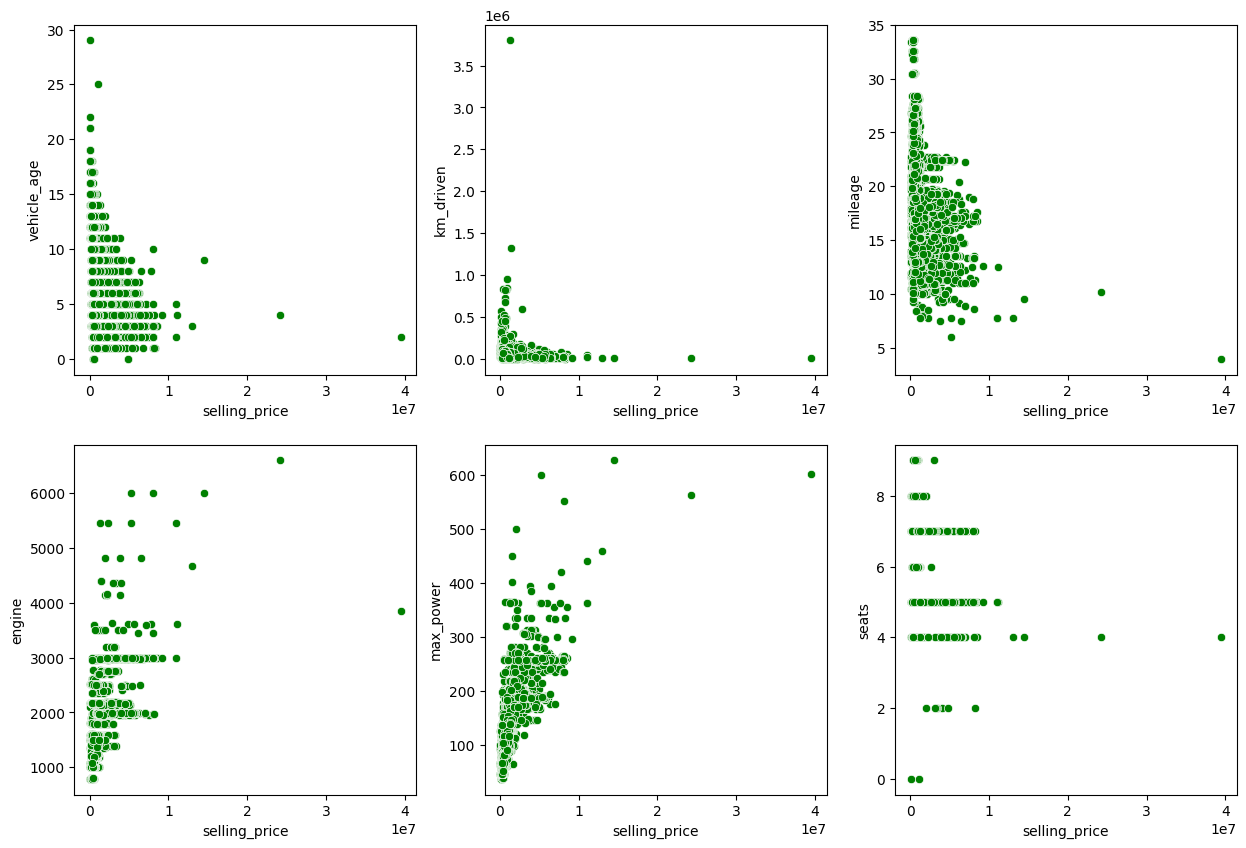

In [27]:
# Plot the relationship of each variable with the selling price(Target Variable)
numerical_columns = ['vehicle_age','km_driven','mileage','engine','max_power','seats']
plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data = df, x='selling_price', y=df[numerical_columns[i]],color='g')
  
plt.show()
 

In [35]:
from IPython.display import display, HTML

display(HTML("""
<h2 style='color:#2c3e50;'>Interpretation of the Scatterplots</h2>

<h3>1. Vehicle Age vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> Older vehicles generally have lower selling prices, showing an inverse relationship.</li>
  <li><b>Outliers:</b> Some older vehicles display unusually high prices.</li>
</ul>

<h3>2. Kilometers Driven vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> Vehicles with fewer kilometers are priced higher, while high-mileage cars cluster at lower prices.</li>
  <li><b>Cluster:</b> A noticeable grouping at low mileage and low selling price.</li>
</ul>

<h3>3. Mileage vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> No strong correlation is visible.</li>
  <li>Low-mileage vehicles tend to cluster around average prices.</li>
</ul>

<h3>4. Engine vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> A positive trend — cars with larger engines typically have higher prices.</li>
</ul>

<h3>5. Max Power vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> Higher power is associated with higher selling prices.</li>
  <li><b>Outliers:</b> Some cars exhibit extremely high power values.</li>
</ul>

<h3>6. Seats vs Selling Price</h3>
<ul>
  <li><b>Observation:</b> No clear relationship is visible.</li>
  <li>Most cars have 4–5 seats, and pricing is not significantly affected by seat count.</li>
</ul>
"""))
